In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from skmultiflow.lazy import SAMKNNClassifier
from skmultiflow.data import FileStream
from skmultiflow.meta import StreamingRandomPatchesClassifier

# Imbalanced Data: Class Distibution

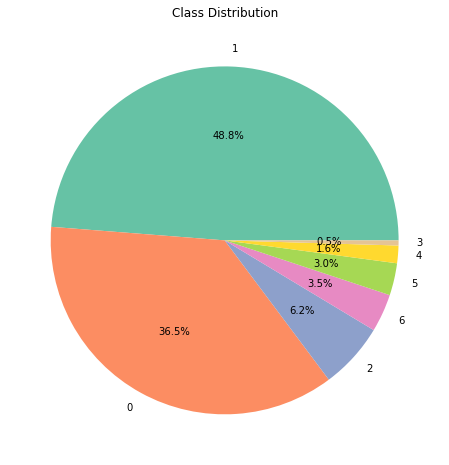

In [7]:
cmap = sns.color_palette("Set2", as_cmap=True)(np.arange(7))
plt.figure(figsize=(8,8))
plt.pie(
    data['Cover_Type'].value_counts().values,
    colors=cmap,
    labels=data['Cover_Type'].value_counts().keys(),
    autopct='%.1f%%'
)
plt.title("Class Distribution")
plt.show()

In [8]:
def split_and_scale(df):
    df = df.copy()
    
    #Split df into x and y
    y = df['Cover_Type'].copy()
    X = df.drop('Cover_Type', axis = 1).copy()
    #Train Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 123)
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
    return X_train, X_test, y_train, y_test
    

In [9]:
def scale(df):
    df = df.copy()
    
    #Split df into x and y
    y = df['Cover_Type'].copy()
    X = df.drop('Cover_Type', axis = 1).copy()
    scaler = StandardScaler()
    scaler.fit(X)
    X = pd.DataFrame(scaler.transform(X), columns = X.columns)
    return X, y

In [10]:
def evaluate_model(model, class_balance, X_test, y_test):
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc*100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='g',vmin = 0, cbar = False, cmap = 'Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('Classificatione Report \n..................\n', clr)

# Undersampling

In [11]:
undersampled_data = data.copy()

In [12]:
undersampled_data['Cover_Type'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [13]:
min_class_size = np.min(undersampled_data['Cover_Type'].value_counts().values)
print("Size of smallest class:", min_class_size)

Size of smallest class: 2747


In [ ]:
class_subsets = [undersampled_data.query("Cover_Type == "+str(i)) for i in range (7)]

In [16]:
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(min_class_size, random_state = 123,replace = False)

In [ ]:
undersampled_data = pd.concat(class_subsets, axis=0).sample(frac = 1.0, random_state = 123).reset_index(drop=True)

In [ ]:
data.sample(10, replace = False)# con false non prendiamo gli stessi campioni

In [19]:
undersampled_data['Cover_Type'].value_counts()

6    2747
5    2747
4    2747
3    2747
2    2747
1    2747
0    2747
Name: Cover_Type, dtype: int64

In [20]:
balance_data = undersampled_data.copy()

In [21]:
y = balance_data['Cover_Type'].copy()
X = balance_data.drop('Cover_Type', axis = 1).copy()

## Scaling Undersampled DataSet

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns = X.columns)

In [24]:
frames = [X, y]

In [25]:
train = pd.concat(frames,axis=1)

In [29]:
under = xy.copy()

In [ ]:
under

In [31]:
under['Cover_Type'] = under['Cover_Type']+1

In [32]:
under.to_csv(r'undersampled.csv',index = False, header=True)

In [34]:
data = pd.read_csv('undersampled.csv')

# Oversampling

In [16]:
oversampled_data = data.copy()

In [17]:
oversampled_data['Cover_Type'].value_counts()

1    283301
0    211840
2     35754
6     20510
5     17367
4      9493
3      2747
Name: Cover_Type, dtype: int64

In [18]:
max_class_size = np.max(oversampled_data['Cover_Type'].value_counts().values)
print("Size of biggest class:", max_class_size)

Size of biggest class: 283301


In [19]:
class_subsets = [oversampled_data.query("Cover_Type == "+str(i)) for i in range (7)]

In [21]:
for i in range(7):
    class_subsets[i] = class_subsets[i].sample(max_class_size, random_state = 123, replace = True)

In [22]:
oversampled_data = pd.concat(class_subsets, axis=0).sample(frac = 1.0, random_state = 123).reset_index(drop=True)

In [23]:
oversampled_data['Cover_Type'].value_counts()

6    283301
5    283301
4    283301
3    283301
2    283301
1    283301
0    283301
Name: Cover_Type, dtype: int64

In [25]:
balance_data = oversampled_data.copy()

In [31]:
y = balance_data['Cover_Type'].copy()
X = balance_data.drop('Cover_Type', axis = 1).copy()

## Scaling Oversampled DataSet

In [37]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns = X.columns)

In [40]:
frames = [X, y]

In [41]:
xy = pd.concat(frames,axis=1)

In [59]:
xy = pd.concat([train, test])

In [61]:
over = xy.copy()

In [62]:
over['Cover_Type'] = over['Cover_Type']+1

In [63]:
over.to_csv(r'oversampled.csv',index = False, header=True)

# Scaling Unbalanced DataSet

In [2]:
data = pd.read_csv('covtype.csv')

In [3]:
data['Cover_Type'] = data['Cover_Type']-1

In [4]:
unbalance_data = data.copy()

In [5]:
y = unbalance_data['Cover_Type'].copy()
X = unbalance_data.drop('Cover_Type', axis = 1).copy()

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), index=X.index, columns = X.columns)

In [8]:
frames = [X, y]

In [9]:
xy = pd.concat(frames,axis=1)

In [13]:
unb = xy.copy()

In [14]:
unb['Cover_Type'] = unb['Cover_Type']+1

In [15]:
unb.to_csv(r'unb.csv',index = False, header=True)

In [23]:
data = pd.read_csv('unb.csv')

In [25]:
data['Cover_Type'].value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64